In [1]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc

In [2]:
!pip3 install PyQt5

     |████████████████████████████████| 47.6MB 42.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 24.7MB/s eta 0:00:01


In [2]:
data_ats = np.load('original_mnist_train_activation_3_ats.npy')
data_pred = np.load('original_mnist_train_pred.npy')

data_test_ats = np.load('mnist_test_activation_3_ats.npy')
data_test_pred = np.load('mnist_test_pred.npy')

data_fgsm_ats = np.load('mnist_fgsm_activation_3_ats.npy')
data_fgsm_pred = np.load('mnist_fgsm_pred.npy')

In [4]:
data_ats.shape, data_pred.shape

((60000, 10), (60000,))

In [5]:
data_test_ats.shape, data_test_pred.shape

((10000, 10), (10000,))

In [6]:
data_fgsm_ats.shape, data_fgsm_pred.shape

((10000, 10), (10000,))

In [7]:
data_subset = data_ats[0:1000]

In [8]:
corr_m = np.corrcoef(data_subset)

In [9]:
corr_m.shape

(1000, 1000)

In [13]:
%matplotlib inline

feat_cols = ['at'+str(i) for i in range(data_ats.shape[1]) ]
df = pd.DataFrame(data_ats,columns=feat_cols)
df["y"] = data_pred

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2]

variance_explained = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(variance_explained))


Explained variation per principal component: [0.3258608  0.26053715 0.16230778]


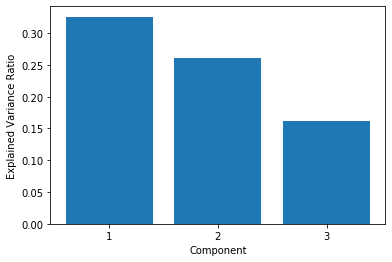

In [11]:
plt.bar(range(3), variance_explained)
plt.xticks(range(3), ('1', '2', '3', '4', '5'))
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

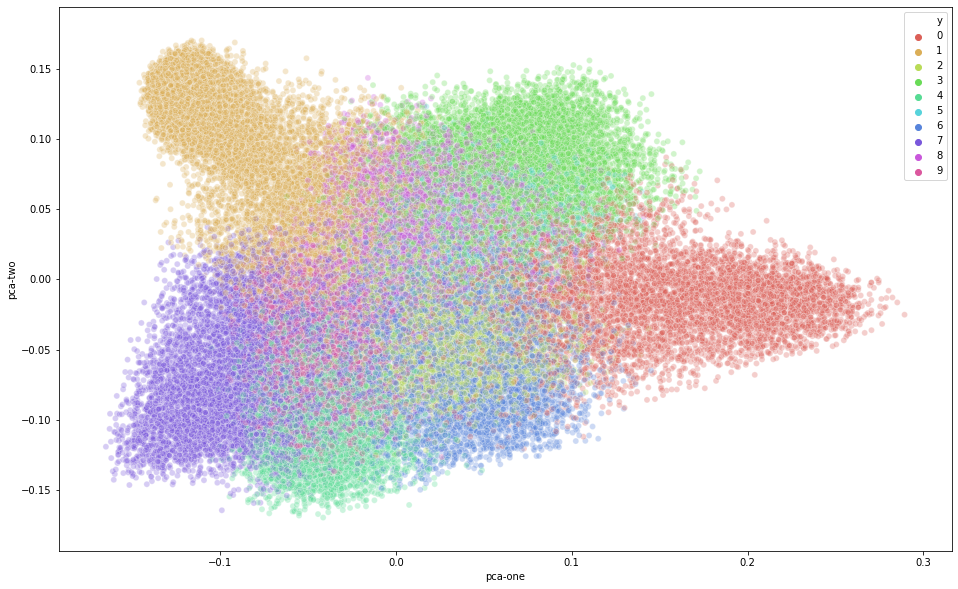

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one',y='pca-two',
    hue = "y",
    data=df.loc[rndperm, :],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)
plt.show()

In [11]:
%matplotlib qt
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(
    xs=df.loc[rndperm[0:10000],:]["pca-one"], 
    ys=df.loc[rndperm[0:10000],:]["pca-two"], 
    zs=df.loc[rndperm[0:10000],:]["pca-three"], 
    c=df.loc[rndperm[0:10000],:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [12]:
df['pca-one'].shape

(60000,)

In [13]:
pca_result.shape, data_pred.shape

((60000, 3), (60000,))

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(pca_result, data_pred)

0.1240778

In [18]:
from sklearn.cluster import KMeans

clusters = KMeans().fit(pca_result)

In [19]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
clusters.labels_

array([6, 0, 4, ..., 6, 3, 1], dtype=int32)

In [21]:
clusters.cluster_centers_

array([[ 0.16863903, -0.0133118 , -0.00304145],
       [ 0.01307734,  0.04096459, -0.00330896],
       [-0.09875613, -0.08699493,  0.08764762],
       [ 0.04159202, -0.05557552, -0.08113889],
       [-0.04032197, -0.09797454,  0.00138138],
       [-0.10324849,  0.11536054, -0.05607368],
       [ 0.07441957,  0.07804197,  0.07882668],
       [-0.05858104, -0.01628119,  0.02185015]], dtype=float32)

In [22]:
y = clusters.predict(pca_result)

In [28]:
df['y_kmeans'] = y

In [29]:
%matplotlib qt
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(
    xs=df.loc[rndperm[0:10000],:]["pca-one"], 
    ys=df.loc[rndperm[0:10000],:]["pca-two"], 
    zs=df.loc[rndperm[0:10000],:]["pca-three"], 
    c=df.loc[rndperm[0:10000], :]['y_kmeans'], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [26]:
y

array([6, 0, 4, ..., 6, 3, 1], dtype=int32)

In [30]:
silhouette_score(pca_result, clusters.labels_, metric='euclidean')

0.38302043

In [31]:
data_ats.shape

(60000, 10)

In [32]:
data_pred.shape

(60000,)

In [14]:
df.head(3)

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,0.062829,0.062198,0.057078
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,0.195401,-0.011138,-0.008898
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,-0.037982,-0.093665,-0.009613


In [34]:
df.shape

(60000, 15)

In [37]:
set(df['y'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [42]:
data_zero = df.loc[df['y'] == 0].iloc[:, 0:10]

In [43]:
data_zero.shape

(6715, 10)

In [44]:
data_zero.head(3)

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197
21,0.330419,0.055526,0.065074,0.076146,0.053969,0.126300,0.074455,0.060293,0.079086,0.078733
37,0.213487,0.059476,0.086486,0.079825,0.069533,0.098200,0.124543,0.069646,0.099920,0.098883


In [46]:
from scipy.stats import normaltest

p_values = data_zero.apply(lambda x: normaltest(x))

In [53]:
p_values = [i.pvalue for i in p_values]

In [54]:
p_values

[0.0,
 1.1765770482404228e-248,
 5.980024156002826e-210,
 3.7158965645843223e-184,
 1.185907880828779e-274,
 3.129951758878836e-39,
 5.0209508450081135e-47,
 5.590806575447376e-240,
 3.410309012467973e-82,
 1.9936194086098034e-90]

In [56]:
vals = {}
for val in range(0, 9):
    data_val = df.loc[df['y'] == val].iloc[:, 0:10]
    p_values = data_val.apply(lambda x: normaltest(x))
    p_values = [i.pvalue for i in p_values]
    vals[val] = p_values

In [57]:
vals

{0: [0.0,
  1.1765770482404228e-248,
  5.980024156002826e-210,
  3.7158965645843223e-184,
  1.185907880828779e-274,
  3.129951758878836e-39,
  5.0209508450081135e-47,
  5.590806575447376e-240,
  3.410309012467973e-82,
  1.9936194086098034e-90],
 1: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.832697063204917e-249,
  2.6713387817904847e-193,
  0.0],
 2: [5.99782199036989e-93,
  5.169801182483509e-65,
  3.0147471166376106e-44,
  5.952046891607861e-59,
  1.4802048153275026e-24,
  2.6151794874572612e-20,
  3.3634119195741805e-10,
  5.470305220804701e-60,
  1.084300135188951e-43,
  5.3733726122629224e-33],
 3: [4.155258498352071e-116,
  2.3459711341076374e-120,
  0.0,
  1.0724907180262439e-100,
  1.0633449530901014e-256,
  7.3972553327303765e-78,
  2.3170163721787574e-121,
  1.6046953577344417e-214,
  2.209285460831556e-52,
  3.0389466451261615e-97],
 4: [7.2965278582397805e-165,
  2.3652448160826548e-68,
  3.353180576216151e-105,
  3.379051770737785e-158,
  1.2168367130075167e-30,
 

In [58]:
pca_result.shape

(60000, 3)

In [17]:
kmeans_alldimensions_test = KMeans(n_clusters=10, max_iter=800).fit(data_test_ats)

In [134]:
%%time

silhouette_score(data_test_ats, kmeans_alldimensions_test.labels_, metric='euclidean')

CPU times: user 4.39 s, sys: 862 ms, total: 5.25 s
Wall time: 1.15 s


0.17090476

In [108]:
from sklearn.metrics import silhouette_samples

In [135]:
%%time
scores = silhouette_samples(data_test_ats, kmeans_alldimensions_test.labels_, metric='euclidean')

CPU times: user 4.36 s, sys: 704 ms, total: 5.06 s
Wall time: 1.13 s


In [110]:
scores

array([ 0.5911676 ,  0.13784502,  0.72783995, ...,  0.06872912,
       -0.02575286,  0.46924   ], dtype=float32)

In [24]:
np.mean(scores)

0.3328678

In [23]:
%time
kmeans_alldimensions_fgsm = KMeans(n_clusters=10, max_iter=800).fit(data_fgsm_ats)
silhouette_score(data_fgsm_ats, kmeans_alldimensions_fgsm.labels_, metric='euclidean')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


0.23526353

In [15]:
%%time
scores_fgsm = silhouette_samples(data_fgsm_ats, kmeans_alldimensions_fgsm.labels_, metric='euclidean')

NameError: name 'silhouette_samples' is not defined

In [113]:
def compute_roc(probs_neg, probs_pos):
    probs = np.concatenate((probs_neg, probs_pos))
    labels = np.concatenate((np.zeros_like(probs_neg), np.ones_like(probs_pos)))
    fpr, tpr, _ = roc_curve(labels, probs)
    auc_score = auc(fpr, tpr)

    return fpr, tpr, auc_score

def compute_roc_auc(test_sa, adv_sa, split=1000):
    tr_test_sa = np.array(test_sa[:split])
    tr_adv_sa = np.array(adv_sa[:split])

    tr_values = np.concatenate(
        (tr_test_sa.reshape(-1, 1), tr_adv_sa.reshape(-1, 1)), axis=0
    )
    tr_labels = np.concatenate(
        (np.zeros_like(tr_test_sa), np.ones_like(tr_adv_sa)), axis=0
    )

    lr = LogisticRegressionCV(cv=5, n_jobs=-1).fit(tr_values, tr_labels)

    ts_test_sa = np.array(test_sa[split:])
    ts_adv_sa = np.array(adv_sa[split:])
    values = np.concatenate(
        (ts_test_sa.reshape(-1, 1), ts_adv_sa.reshape(-1, 1)), axis=0
    )
    labels = np.concatenate(
        (np.zeros_like(ts_test_sa), np.ones_like(ts_adv_sa)), axis=0
    )

    probs = lr.predict_proba(values)[:, 1]

    _, _, auc_score = compute_roc(
        probs_neg=probs[: (len(test_sa) - split)],
        probs_pos=probs[(len(test_sa) - split) :],
    )

    return auc_score

In [138]:
compute_roc_auc(scores, scores_fgsm)

0.6024950617283951

In [66]:
%matplotlib inline

feat_cols = ['at'+str(i) for i in range(data_test_ats.shape[1]) ]
df_test = pd.DataFrame(data_test_ats,columns=feat_cols)
df_test["y"] = data_test_pred

np.random.seed(42)
rndperm = np.random.permutation(df_test.shape[0])

pca_test = PCA(n_components=4)
pca_result_test = pca_test.fit_transform(df_test[feat_cols].values)

df_test['pca-one'] = pca_result_test[:, 0]
df_test['pca-two'] = pca_result_test[:, 1]
df_test['pca-three'] = pca_result_test[:, 2]

variance_explained = pca_test.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(variance_explained))

Explained variation per principal component: [0.32437617 0.26495928 0.16164206 0.12382702]


In [28]:
%matplotlib inline

feat_cols = ['at'+str(i) for i in range(data_fgsm_ats.shape[1]) ]
df_fgsm = pd.DataFrame(data_fgsm_ats,columns=feat_cols)
df_fgsm["y"] = data_fgsm_pred

np.random.seed(42)
rndperm = np.random.permutation(df_fgsm.shape[0])

pca_fgsm = PCA(n_components=4)
pca_result_fgsm = pca_fgsm.fit_transform(df_fgsm[feat_cols].values)

df_fgsm['pca-one'] = pca_result_fgsm[:, 0]
df_fgsm['pca-two'] = pca_result_fgsm[:, 1]
df_fgsm['pca-three'] = pca_result_fgsm[:, 2]

variance_explained = pca_fgsm.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(variance_explained))

Explained variation per principal component: [0.3780348  0.2863479  0.13780922 0.08374654]


In [123]:
%%time
kmeans_alldimensions_test_pca = KMeans(n_clusters=5, max_iter=800).fit(pca_result_test)
scores_test_pca = silhouette_samples(data_test_ats, kmeans_alldimensions_test_pca.labels_, metric='euclidean')
print(np.mean(scores_test_pca))

kmeans_alldimensions_fgsm_pca = KMeans(n_clusters=5, max_iter=800).fit(pca_result_fgsm)
scores_fgsm_pca = silhouette_samples(data_fgsm_ats, kmeans_alldimensions_fgsm_pca.labels_, metric='euclidean')
print(np.mean(scores_fgsm_pca))

0.36175382
0.26451376
CPU times: user 8.85 s, sys: 1.66 s, total: 10.5 s
Wall time: 2.52 s


In [124]:
compute_roc_auc(scores_test_pca, scores_fgsm_pca)

0.6487904320987654

In [128]:
data_fgsm_pred.shape, scores_fgsm.shape

((10000,), (10000,))

1. Cluster on training data
2. Assign test and adversarial examples to the specific clusters
3. Re-compute silhouette scores
4. Re-compute auc-roc

In [139]:
data_ats.shape

(60000, 10)

In [140]:
%time
kmeans_all_dimensions_train = KMeans(n_clusters=10).fit(data_ats)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


In [21]:
#Assign test to clusters
y_test = kmeans_alldimensions_test.predict(data_test_ats)

In [25]:
y_fgsm = kmeans_alldimensions_fgsm.predict(data_fgsm_ats)

In [146]:
silhouette_score(data_test_ats, y_test, metric='euclidean')

0.32884952

In [147]:
silhouette_score(data_fgsm_ats, y_fgsm, metric='euclidean')

0.23529339

In [148]:
scores_test = silhouette_samples(data_test_ats, y_test, metric='euclidean')
scores_fgsm = silhouette_samples(data_fgsm_ats, y_fgsm, metric='euclidean')

In [149]:
compute_roc_auc(scores_test, scores_fgsm)

0.6266676049382717

1. Look at each class-cluster assignments
2. Find samples in each class with high SS values
3. Recompute auc-roc based only on these samples

In [26]:
y_test

array([7, 1, 4, ..., 0, 1, 3], dtype=int32)

In [29]:
df_fgsm

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three
0,0.096631,0.081741,0.084890,0.110647,0.104501,0.078610,0.073195,0.156009,0.101946,0.111829,7,-0.038122,-0.036667,0.040241
1,0.123036,0.074848,0.119466,0.152750,0.065030,0.098632,0.098533,0.067234,0.114679,0.085792,3,0.054114,-0.012642,-0.030796
2,0.097176,0.120166,0.099325,0.106523,0.088673,0.089029,0.085991,0.103393,0.104416,0.105308,1,-0.017147,-0.031382,-0.011973
3,0.182826,0.050376,0.104910,0.098721,0.082997,0.089446,0.115086,0.083828,0.086660,0.105150,0,0.040572,0.060488,0.025188
4,0.106514,0.060422,0.123619,0.086338,0.120557,0.070784,0.111023,0.115176,0.091215,0.114352,2,-0.043127,0.028418,0.006082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.101825,0.058395,0.147345,0.137953,0.084461,0.073488,0.086534,0.098462,0.123394,0.088144,2,0.011175,-0.008994,-0.029849
9996,0.128765,0.054482,0.095139,0.200263,0.059121,0.103326,0.083350,0.081702,0.103839,0.090015,3,0.082099,-0.041554,0.004502
9997,0.088717,0.078457,0.095966,0.101806,0.109521,0.084451,0.095828,0.112627,0.116070,0.116557,9,-0.032839,-0.017615,0.004043
9998,0.103641,0.094757,0.104643,0.100377,0.090691,0.099362,0.099481,0.086910,0.123623,0.096516,8,-0.002255,-0.010942,-0.022047


In [30]:
df_fgsm['y_kmeans'] = y_fgsm

In [31]:
df_fgsm

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three,y_kmeans
0,0.096631,0.081741,0.084890,0.110647,0.104501,0.078610,0.073195,0.156009,0.101946,0.111829,7,-0.038122,-0.036667,0.040241,7
1,0.123036,0.074848,0.119466,0.152750,0.065030,0.098632,0.098533,0.067234,0.114679,0.085792,3,0.054114,-0.012642,-0.030796,9
2,0.097176,0.120166,0.099325,0.106523,0.088673,0.089029,0.085991,0.103393,0.104416,0.105308,1,-0.017147,-0.031382,-0.011973,6
3,0.182826,0.050376,0.104910,0.098721,0.082997,0.089446,0.115086,0.083828,0.086660,0.105150,0,0.040572,0.060488,0.025188,8
4,0.106514,0.060422,0.123619,0.086338,0.120557,0.070784,0.111023,0.115176,0.091215,0.114352,2,-0.043127,0.028418,0.006082,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.101825,0.058395,0.147345,0.137953,0.084461,0.073488,0.086534,0.098462,0.123394,0.088144,2,0.011175,-0.008994,-0.029849,1
9996,0.128765,0.054482,0.095139,0.200263,0.059121,0.103326,0.083350,0.081702,0.103839,0.090015,3,0.082099,-0.041554,0.004502,9
9997,0.088717,0.078457,0.095966,0.101806,0.109521,0.084451,0.095828,0.112627,0.116070,0.116557,9,-0.032839,-0.017615,0.004043,0
9998,0.103641,0.094757,0.104643,0.100377,0.090691,0.099362,0.099481,0.086910,0.123623,0.096516,8,-0.002255,-0.010942,-0.022047,6


In [33]:
df_fgsm_zero = df_fgsm.loc[df_fgsm['y'] == 0]

In [34]:
df_fgsm_zero

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three,y_kmeans
3,0.182826,0.050376,0.104910,0.098721,0.082997,0.089446,0.115086,0.083828,0.086660,0.105150,0,0.040572,0.060488,0.025188,8
8,0.132805,0.061604,0.130245,0.073574,0.117115,0.082810,0.127078,0.094383,0.079441,0.100946,0,-0.023383,0.061563,-0.001661,3
10,0.198176,0.052976,0.101200,0.136721,0.065014,0.110000,0.089211,0.059507,0.105504,0.081692,0,0.098294,0.034064,0.016377,8
11,0.149613,0.065405,0.114479,0.103758,0.090290,0.095265,0.104488,0.074369,0.105827,0.096506,0,0.028965,0.033025,-0.003418,4
13,0.176911,0.048574,0.100061,0.105042,0.092343,0.095714,0.100324,0.079156,0.096726,0.105149,0,0.042898,0.046912,0.028141,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,0.138511,0.089145,0.112999,0.117697,0.068504,0.102612,0.096336,0.075713,0.103852,0.094631,0,0.037851,0.004973,-0.015164,4
9980,0.159978,0.042529,0.104485,0.139038,0.073854,0.087957,0.087982,0.095431,0.111713,0.097035,0,0.054857,0.012255,0.021983,4
9983,0.230377,0.048184,0.086285,0.116810,0.060919,0.108700,0.080822,0.070586,0.105992,0.091324,0,0.104364,0.050671,0.046901,8
9993,0.191827,0.055136,0.090691,0.105911,0.077553,0.117778,0.092640,0.069649,0.110142,0.088674,0,0.072571,0.040698,0.026133,8


In [37]:
df_fgsm_zero.shape

(1754, 15)

In [57]:
a = {0: 2, 1:3, 2: 5}

a = {i:v for i, v in a.items() if v > 2}

In [58]:
a

{1: 3, 2: 5}

In [61]:
digit_labels = {}

for k in range(10):
    
    labels = {}
    
    df_fgsm_i = df_fgsm.loc[df_fgsm['y'] == k]
    for i in df_fgsm_i['y_kmeans']:
        labels[i] = labels.get(i, 0) + 1
    
    for l, v in labels.items():
        labels[l] = v/df_fgsm_i.shape[0]
        
    labels = {l:v for l,v in labels.items() if v > 0.1}
        
    digit_labels[k] = labels

In [62]:
digit_labels

{0: {8: 0.3808437856328392, 3: 0.11972633979475485, 4: 0.40193842645381983},
 1: {6: 1.0},
 2: {3: 0.10331384015594541, 1: 0.5740740740740741, 6: 0.17738791423001948},
 3: {9: 0.3925992779783393, 2: 0.37635379061371843},
 4: {0: 0.11961206896551724, 5: 0.8588362068965517},
 5: {0: 0.1951219512195122,
  4: 0.2926829268292683,
  6: 0.2682926829268293,
  2: 0.21951219512195122},
 6: {3: 0.8333333333333334},
 7: {7: 0.7701396348012889, 0: 0.13426423200859292},
 8: {6: 0.3479236812570146, 2: 0.41301907968574636, 0: 0.19640852974186307},
 9: {5: 0.2536231884057971, 0: 0.644927536231884}}

In [39]:
labels

{8: 668, 3: 210, 4: 705, 0: 63, 6: 24, 9: 24, 1: 10, 5: 27, 2: 11, 7: 12}

In [164]:
df_fgsm_zero['y_kmeans'].unique()

array([6, 4, 0, 5, 3, 2, 9, 8, 1, 7])

In [166]:
df_fgsm_five = df_fgsm.loc[df_fgsm['y'] == 5]
df_fgsm_five['y_kmeans'].unique()

array([5, 0, 3, 1, 2])

In [169]:
for i in range(10):
    df_i = df_fgsm.loc[df_fgsm['y'] == i]
    print(i, df_i['y_kmeans'].unique())

0 [6 4 0 5 3 2 9 8 1 7]
1 [3]
2 [8 4 9 3 1 5 7 0]
3 [2 5 0 3 1 7 9 8]
4 [5 8 3 7 4]
5 [5 0 3 1 2]
6 [4 0 5 8 3 1]
7 [7 5 3 8]
8 [3 1 5 4 0 9 8]
9 [7 8 5 3 4]


In [170]:
y_fgsm

array([7, 2, 3, ..., 5, 3, 4], dtype=int32)

In [171]:
scores_fgsm

array([0.42458594, 0.02667994, 0.5317227 , ..., 0.29566562, 0.27305296,
       0.19305669], dtype=float32)

In [172]:
scores_fgsm_high = scores_fgsm[scores_fgsm > np.mean(scores_fgsm)]

In [173]:
scores_fgsm_high.shape

(4749,)

In [174]:
scores_test_high = scores_test[scores_test > np.mean(scores_test)]

In [175]:
scores_test_high.shape

(4725,)

In [176]:
compute_roc_auc(scores_test_high, scores_fgsm_high)

0.8181302217504087

In [178]:
original_dsascores_test = np.load('original_dsa_test.npy')
original_dsascores_fgsm = np.load('original_dsa_target.npy')

In [179]:
original_dsascores_fgsm

array([1.01710653, 0.68509018, 0.70601147, ..., 1.38997483, 1.57346749,
       0.80382591])

In [180]:
scores_dsa_high_test = original_dsascores_test[original_dsascores_test > np.mean(original_dsascores_test)]
scores_dsa_high_fgsm = original_dsascores_fgsm[original_dsascores_fgsm > np.mean(original_dsascores_fgsm)]

In [181]:
scores_dsa_high_fgsm.shape

(4936,)

In [182]:
scores_dsa_high_test.shape

(4170,)

In [183]:
compute_roc_auc(scores_dsa_high_test, scores_dsa_high_fgsm)

0.8562330890461901

In [276]:
scores_test_20 = np.sort(scores_test)[::-1][0:int(0.2*len(scores_test))]

In [277]:
scores_test_20.shape

(2000,)

In [278]:
scores_fgsm_20 = np.sort(scores_fgsm)[::-1][0:int(0.2*len(scores_fgsm))]

In [279]:
scores_fgsm_20.shape

(2000,)

In [280]:
compute_roc_auc(scores_test_20, scores_fgsm_20)

1.0

In [275]:
scores_dsa_test_20 = np.sort(original_dsascores_test)[::-1][0:int(0.2*len(original_dsascores_test))]
scores_dsa_fgsm_20 = np.sort(original_dsascores_fgsm)[::-1][0:int(0.2*len(original_dsascores_fgsm))]

compute_roc_auc(scores_dsa_test_20, scores_dsa_fgsm_20)

1.0

In [228]:
df.head(3)

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,0.062829,0.062198,0.057078
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,0.195401,-0.011138,-0.008898
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,-0.037982,-0.093665,-0.009613


In [235]:
df.iloc[:, 0:10].describe()

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.100342,0.105873,0.092222,0.098584,0.092514,0.081810,0.100198,0.111438,0.106641,0.110378
std,0.065017,0.068587,0.037192,0.053745,0.040342,0.025534,0.044406,0.056642,0.033767,0.025563
min,0.039831,0.023175,0.033605,0.023961,0.030389,0.031865,0.033580,0.032734,0.040936,0.057982
25%,0.061616,0.059772,0.069378,0.066061,0.062024,0.063574,0.070973,0.072002,0.083206,0.091721
50%,0.078750,0.083283,0.081647,0.080923,0.081584,0.076680,0.087938,0.096489,0.100955,0.103620
75%,0.107858,0.123501,0.102783,0.110443,0.114165,0.096031,0.114018,0.133108,0.122642,0.126289
max,0.447688,0.325244,0.328435,0.411317,0.263643,0.213841,0.312760,0.381735,0.272117,0.205936


In [254]:
df.head(5)

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,0.062829,0.062198,0.057078
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,0.195401,-0.011138,-0.008898
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,-0.037982,-0.093665,-0.009613
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1,-0.103454,0.114654,-0.057006
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9,-0.079299,-0.067409,0.020429


In [247]:
df.rows()

AttributeError: 'DataFrame' object has no attribute 'rows'

In [248]:
from scipy.stats import entropy

In [252]:
entropy(np.array(df.iloc[0, 0:10]), np.array(df.iloc[1, 0:10]))

0.149902080861973

In [253]:
entropy(np.array(df.iloc[0, 0:10]), np.array(df.iloc[2, 0:10]))

0.20703007404834048

In [255]:
entropy(np.array(df.iloc[0, 0:10]), np.array(df.iloc[3, 0:10]))

0.1861181542737147

In [256]:
entropy(np.array(df.iloc[0, 0:10]), np.array(df.iloc[4, 0:10]))

0.21745435479945935

In [14]:
data_train_ats = df.iloc[:, 0:11]

In [15]:
data_train_ats

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.076356,0.109601,0.089056,0.117723,0.066108,0.090188,0.078941,0.075943,0.209739,0.086345,8
59996,0.097789,0.088422,0.070938,0.241655,0.046019,0.104488,0.057998,0.063088,0.145288,0.084316,3
59997,0.094951,0.111562,0.040379,0.136519,0.065977,0.148984,0.061537,0.106539,0.127377,0.106176,5
59998,0.144078,0.081723,0.096810,0.062171,0.096225,0.094090,0.163343,0.077165,0.075401,0.108994,6


In [64]:
df

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,pca-one,pca-two,pca-three
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,0.062829,0.062198,0.057078
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,0.195401,-0.011138,-0.008898
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,-0.037982,-0.093665,-0.009613
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1,-0.103454,0.114654,-0.057006
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9,-0.079299,-0.067409,0.020429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.076356,0.109601,0.089056,0.117723,0.066108,0.090188,0.078941,0.075943,0.209739,0.086345,8,0.015295,0.072550,0.004980
59996,0.097789,0.088422,0.070938,0.241655,0.046019,0.104488,0.057998,0.063088,0.145288,0.084316,3,0.072117,0.110228,0.088927
59997,0.094951,0.111562,0.040379,0.136519,0.065977,0.148984,0.061537,0.106539,0.127377,0.106176,5,0.013276,0.063988,0.059267
59998,0.144078,0.081723,0.096810,0.062171,0.096225,0.094090,0.163343,0.077165,0.075401,0.108994,6,0.054727,-0.042228,-0.060044


In [111]:
%%time
kmeans_alldimensions_train = KMeans(n_clusters=10).fit(data_train_ats.iloc[:, 0:10])

CPU times: user 7.55 s, sys: 641 ms, total: 8.19 s
Wall time: 2.88 s


In [112]:
data_train_ats['y_kmeans'] = kmeans_alldimensions_train.labels_

In [113]:
data_train_ats

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,y_kmeans
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,2
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,4
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,7
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1,3
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.076356,0.109601,0.089056,0.117723,0.066108,0.090188,0.078941,0.075943,0.209739,0.086345,8,0
59996,0.097789,0.088422,0.070938,0.241655,0.046019,0.104488,0.057998,0.063088,0.145288,0.084316,3,9
59997,0.094951,0.111562,0.040379,0.136519,0.065977,0.148984,0.061537,0.106539,0.127377,0.106176,5,0
59998,0.144078,0.081723,0.096810,0.062171,0.096225,0.094090,0.163343,0.077165,0.075401,0.108994,6,8


In [220]:
%%time
digit_labels = {}

for k in range(10):
    
    labels = {}
    
    df_i = data_train_ats.loc[data_train_ats['y'] == k]
    for i in df_i['y_kmeans']:
        labels[i] = labels.get(i, 0) + 1
    
    for l, v in labels.items():
        labels[l] = v/df_i.shape[0]
        
    labels = {l:v for l,v in labels.items()}
        
    digit_labels[k] = labels

CPU times: user 33.1 ms, sys: 1.2 ms, total: 34.3 ms
Wall time: 33.2 ms


In [221]:
digit_labels

{0: {4: 0.6220402084884586,
  2: 0.3362620997766195,
  7: 0.00774385703648548,
  8: 0.011466865227103499,
  6: 0.018912881608339538,
  1: 0.0029784065524944155,
  9: 0.0004467609828741623,
  0: 0.0001489203276247208},
 1: {3: 0.6780159332321699,
  1: 0.1451062215477997,
  0: 0.17346358118361152,
  6: 0.0018968133535660092,
  2: 0.0015174506828528073},
 2: {6: 0.9262180974477958,
  7: 0.021809744779582366,
  1: 0.011368909512761021,
  0: 0.03642691415313225,
  2: 0.004176334106728539},
 3: {2: 0.15172765523396659,
  9: 0.6905520846614815,
  0: 0.128649751370649,
  1: 0.025627948489098558,
  6: 0.0033150580135152363,
  7: 0.00012750223128904755},
 4: {7: 0.9408988302893495,
  1: 0.0568438333675354,
  6: 0.0016416991586291811,
  0: 0.00020521239482864764,
  8: 0.00020521239482864764,
  2: 0.00020521239482864764},
 5: {0: 0.11279333838001514,
  2: 0.8508705526116578,
  1: 0.03255109765329296,
  9: 0.003785011355034065},
 6: {8: 0.808334711427154,
  0: 0.05457251529684141,
  2: 0.0525880601

In [181]:
max(digit_labels[0], key = digit_labels[0].get)

4

In [204]:
max_points = map(lambda x: max(digit_labels[x], key = digit_labels[x].get), digit_labels)

In [205]:
max_points = list(max_points)

In [206]:
max_points

[4, 3, 6, 9, 7, 2, 8, 5, 0, 1]

In [208]:
highest_clusters = {i:max_points[i] for i in list(digit_labels.keys())}

In [209]:
highest_clusters

{0: 4, 1: 3, 2: 6, 3: 9, 4: 7, 5: 2, 6: 8, 7: 5, 8: 0, 9: 1}

In [110]:
digit_labels[8].values()

dict_values([0.655645784996133, 0.030355761794276875, 0.010440835266821345, 0.06477184841453983, 0.06303170920340294, 0.062451662799690645, 0.05046403712296984, 0.017594740912606342, 0.04118329466357309, 0.0009667440061871616, 0.0030935808197989174])

In [156]:
th = 0.1
cum_sum = 0
indices = []
sampling_ratio = 0.9
cluster_indices= []

In [157]:
digit_labels[0]

{4: 0.657276198738713, 2: 0.3427237979936524}

In [177]:
%%time
import random


new_class_matrix = {}

for i in range(10):
    
    digit_labels[i] = {i:v for i,v in digit_labels[i].items() if v > th}
    
    #print(digit_labels[i])
    
    for l in digit_labels[i]:
        factor=1.0/sum(digit_labels[i].values())
        digit_labels[i][l] = digit_labels[i][l] * factor
        
    #print(i, digit_labels[i])
    
        
    df_i = data_train_ats.loc[data_train_ats['y'] == i]
    cluster_indices = []
    for k,v in digit_labels[i].items():
    
        indices = df_i.loc[df_i['y_kmeans'] == k].index.tolist()
       
        sample_number = min(int(sampling_ratio * len(indices)), len(indices))
        sampled_indices = random.sample(indices, sample_number)
        #print(i, k, len(set(indices) - set(sampled_indices)))
        #sampled_indices = indices[0:int(sampling_ratio * len(indices))] Select first s%
        #sampled_indices = indices[int((1-sampling_ratio) * len(indices)):] Select last s%
        chosen_indices = list(set(indices) - set(sampled_indices))
        chosen_indices.extend(sampled_indices[0:int(0.5*len(sampled_indices))])
        cluster_indices.extend(chosen_indices)
        #print(i, k, len(indices), sample_number, len(sampled_indices), len(cluster_indices))
        
        
    new_class_matrix[i] = cluster_indices

CPU times: user 84.3 ms, sys: 1.39 ms, total: 85.7 ms
Wall time: 84.7 ms


In [211]:
new_class_matrix = {}

for i in range(10):
    
    df_i = data_train_ats.loc[data_train_ats['y'] == i]
    
    highest_cluster = highest_clusters[i]
    
    indices = df_i.loc[df_i['y_kmeans'] == highest_cluster].index.tolist()
    
    new_class_matrix[i] = indices

In [213]:
new_class_matrix[3]

[7,
 10,
 12,
 27,
 49,
 50,
 74,
 98,
 107,
 111,
 130,
 135,
 136,
 149,
 157,
 179,
 182,
 198,
 203,
 215,
 235,
 242,
 254,
 255,
 266,
 279,
 281,
 284,
 291,
 298,
 316,
 321,
 327,
 330,
 341,
 346,
 356,
 361,
 392,
 404,
 405,
 433,
 479,
 486,
 490,
 495,
 504,
 544,
 546,
 549,
 557,
 602,
 620,
 643,
 675,
 695,
 715,
 731,
 748,
 752,
 760,
 767,
 789,
 811,
 830,
 840,
 856,
 861,
 866,
 867,
 874,
 875,
 886,
 890,
 895,
 909,
 924,
 953,
 975,
 983,
 992,
 998,
 1021,
 1032,
 1068,
 1104,
 1108,
 1130,
 1144,
 1145,
 1150,
 1151,
 1158,
 1206,
 1210,
 1218,
 1226,
 1236,
 1290,
 1312,
 1315,
 1317,
 1320,
 1324,
 1336,
 1352,
 1356,
 1364,
 1370,
 1378,
 1409,
 1420,
 1428,
 1429,
 1432,
 1470,
 1474,
 1490,
 1526,
 1566,
 1581,
 1583,
 1588,
 1594,
 1599,
 1603,
 1611,
 1631,
 1634,
 1644,
 1668,
 1675,
 1677,
 1689,
 1698,
 1718,
 1722,
 1737,
 1752,
 1753,
 1755,
 1756,
 1778,
 1790,
 1791,
 1799,
 1805,
 1809,
 1829,
 1843,
 1862,
 1863,
 1872,
 1883,
 1921,
 1924,

In [179]:
len(new_class_matrix[0])

3539

In [210]:
highest_clusters

{0: 4, 1: 3, 2: 6, 3: 9, 4: 7, 5: 2, 6: 8, 7: 5, 8: 0, 9: 1}

In [144]:
df_zero.shape[0]

6715

In [ ]:
for k,v in digit_labels.items():
    
    

In [89]:
digit_labels[0]

{1: 0.6220402084884586,
 6: 0.3362620997766195,
 9: 0.00774385703648548,
 5: 0.011466865227103499,
 3: 0.018912881608339538,
 2: 0.0029784065524944155,
 4: 0.0004467609828741623,
 0: 0.0001489203276247208}

In [104]:
from itertools import takewhile,accumulate

list(takewhile(lambda x: x<1, accumulate(x for x in digit_labels[0].values())))

[0.6220402084884586,
 0.9583023082650781,
 0.9660461653015636,
 0.9775130305286671,
 0.9964259121370067,
 0.9994043186895011,
 0.9998510796723753]

In [117]:
dict(sorted(digit_labels[1].items(), key=lambda item: item[1], reverse=True))

{8: 0.6780159332321699,
 0: 0.17346358118361152,
 2: 0.1451062215477997,
 3: 0.0018968133535660092,
 6: 0.0015174506828528073}

In [93]:
arr = np.array(digit_labels[0])[0]
arr[arr.cumsum() <= 0.75].tolist()

IndexError: too many indices for array

In [94]:
arr

array({1: 0.6220402084884586, 6: 0.3362620997766195, 9: 0.00774385703648548, 5: 0.011466865227103499, 3: 0.018912881608339538, 2: 0.0029784065524944155, 4: 0.0004467609828741623, 0: 0.0001489203276247208},
      dtype=object)

In [264]:
for i in range(10):
    data = data_train_ats.loc[data_train_ats['y'] == i]
    get_entropy(i, data, data_train_ats)
    

In [159]:
df_zero.loc[df_zero['y_kmeans'] == 1].index.tolist()
                                            

[1,
 21,
 51,
 56,
 63,
 88,
 95,
 114,
 118,
 119,
 121,
 156,
 192,
 206,
 209,
 229,
 249,
 283,
 293,
 296,
 303,
 320,
 326,
 359,
 399,
 427,
 429,
 435,
 440,
 453,
 458,
 462,
 464,
 473,
 489,
 519,
 524,
 526,
 577,
 596,
 603,
 612,
 633,
 639,
 669,
 689,
 702,
 709,
 733,
 743,
 745,
 781,
 787,
 790,
 818,
 825,
 849,
 859,
 860,
 872,
 902,
 927,
 949,
 965,
 1018,
 1028,
 1040,
 1078,
 1090,
 1093,
 1107,
 1152,
 1179,
 1209,
 1304,
 1310,
 1363,
 1367,
 1368,
 1371,
 1372,
 1386,
 1403,
 1443,
 1471,
 1479,
 1489,
 1495,
 1501,
 1502,
 1517,
 1530,
 1532,
 1571,
 1590,
 1596,
 1605,
 1606,
 1625,
 1626,
 1645,
 1664,
 1678,
 1701,
 1709,
 1712,
 1723,
 1725,
 1729,
 1742,
 1769,
 1771,
 1775,
 1797,
 1798,
 1819,
 1828,
 1837,
 1857,
 1868,
 1877,
 1897,
 1907,
 1926,
 1927,
 1930,
 1956,
 1963,
 1969,
 1995,
 1999,
 2009,
 2051,
 2058,
 2079,
 2081,
 2082,
 2084,
 2100,
 2112,
 2121,
 2147,
 2160,
 2191,
 2195,
 2245,
 2253,
 2257,
 2258,
 2269,
 2298,
 2325,
 2327,
 

In [156]:
data_train_ats

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,y_kmeans
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,6
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,1
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,9
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1,8
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.076356,0.109601,0.089056,0.117723,0.066108,0.090188,0.078941,0.075943,0.209739,0.086345,8,0
59996,0.097789,0.088422,0.070938,0.241655,0.046019,0.104488,0.057998,0.063088,0.145288,0.084316,3,4
59997,0.094951,0.111562,0.040379,0.136519,0.065977,0.148984,0.061537,0.106539,0.127377,0.106176,5,0
59998,0.144078,0.081723,0.096810,0.062171,0.096225,0.094090,0.163343,0.077165,0.075401,0.108994,6,5


In [178]:
len(new_class_matrix[3])

2283

In [179]:
sorted(new_class_matrix[3])

[7,
 10,
 12,
 44,
 48,
 49,
 182,
 198,
 215,
 235,
 242,
 254,
 266,
 284,
 291,
 298,
 321,
 341,
 392,
 486,
 490,
 504,
 516,
 561,
 581,
 695,
 722,
 726,
 752,
 760,
 856,
 861,
 867,
 878,
 886,
 890,
 909,
 924,
 970,
 974,
 992,
 998,
 1144,
 1151,
 1158,
 1226,
 1282,
 1295,
 1320,
 1382,
 1409,
 1420,
 1428,
 1432,
 1469,
 1476,
 1486,
 1533,
 1556,
 1581,
 1592,
 1634,
 1651,
 1668,
 1675,
 1689,
 1722,
 1752,
 1778,
 1809,
 1862,
 1863,
 1872,
 1883,
 1924,
 1941,
 2011,
 2080,
 2087,
 2143,
 2172,
 2179,
 2203,
 2228,
 2230,
 2233,
 2241,
 2315,
 2328,
 2468,
 2506,
 2524,
 2534,
 2568,
 2587,
 2603,
 2605,
 2672,
 2682,
 2705,
 2758,
 2796,
 2818,
 2886,
 2960,
 3005,
 3013,
 3033,
 3208,
 3233,
 3254,
 3266,
 3435,
 3460,
 3471,
 3491,
 3542,
 3576,
 3591,
 3606,
 3651,
 3674,
 3680,
 3683,
 3684,
 3707,
 3713,
 3740,
 3744,
 3768,
 3855,
 3872,
 4004,
 4022,
 4076,
 4101,
 4121,
 4138,
 4156,
 4179,
 4204,
 4223,
 4235,
 4250,
 4262,
 4312,
 4335,
 4339,
 4352,
 4359,

In [8]:
orig = np.load('original_class_matrix_example.npy', allow_pickle=True)[0]

In [181]:
set(new_class_matrix[3]).issubset(set(orig))

True

In [214]:
with open('new_class_matrix.npy', 'wb') as f:
    np.save(f, [new_class_matrix])

In [124]:
nc = np.load('new_class_matrix.npy', allow_pickle=True)[0]

In [135]:
len(new_class_matrix[8])

4487

In [200]:
sampling_ratio

0.4

In [48]:
for label in range(10):
    
    print(set(nc[label]).issubset(set(orig[label])))

True
True
True
True
True
True
True
True
True
True


In [84]:
for label in range(10):
    
    print(set(nc[label]).issubset(set(orig[label])))

True
True
True
True
True
True
True
True
True
True


In [217]:
ratios = []
for i in range(10):
    
    ratios.append(len(new_class_matrix[i])/data_train_ats.loc[data_train_ats['y'] == i].shape[0])
    print(len(new_class_matrix[i])/data_train_ats.loc[data_train_ats['y'] == i].shape[0])
    

0.6220402084884586
0.6780159332321699
0.9262180974477958
0.6905520846614815
0.9408988302893495
0.8508705526116578
0.808334711427154
0.495796507868075
0.8675560711523589
0.5660764690787785


In [218]:
np.mean(ratios)

0.744635946625728

In [222]:
digit_labels

{0: {4: 0.6220402084884586,
  2: 0.3362620997766195,
  7: 0.00774385703648548,
  8: 0.011466865227103499,
  6: 0.018912881608339538,
  1: 0.0029784065524944155,
  9: 0.0004467609828741623,
  0: 0.0001489203276247208},
 1: {3: 0.6780159332321699,
  1: 0.1451062215477997,
  0: 0.17346358118361152,
  6: 0.0018968133535660092,
  2: 0.0015174506828528073},
 2: {6: 0.9262180974477958,
  7: 0.021809744779582366,
  1: 0.011368909512761021,
  0: 0.03642691415313225,
  2: 0.004176334106728539},
 3: {2: 0.15172765523396659,
  9: 0.6905520846614815,
  0: 0.128649751370649,
  1: 0.025627948489098558,
  6: 0.0033150580135152363,
  7: 0.00012750223128904755},
 4: {7: 0.9408988302893495,
  1: 0.0568438333675354,
  6: 0.0016416991586291811,
  0: 0.00020521239482864764,
  8: 0.00020521239482864764,
  2: 0.00020521239482864764},
 5: {0: 0.11279333838001514,
  2: 0.8508705526116578,
  1: 0.03255109765329296,
  9: 0.003785011355034065},
 6: {8: 0.808334711427154,
  0: 0.05457251529684141,
  2: 0.0525880601

In [223]:
data_train_ats

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9,y,y_kmeans
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337,3,2
1,0.321664,0.054950,0.064619,0.070376,0.050816,0.117456,0.092115,0.058961,0.083846,0.085197,0,4
2,0.073862,0.073515,0.108160,0.065556,0.186821,0.070890,0.108295,0.130047,0.063730,0.119124,4,7
3,0.055612,0.257586,0.090330,0.067732,0.072306,0.072219,0.064163,0.101676,0.135630,0.082746,1,3
4,0.057363,0.099296,0.070251,0.059077,0.148893,0.061651,0.085224,0.152183,0.088296,0.177766,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.076356,0.109601,0.089056,0.117723,0.066108,0.090188,0.078941,0.075943,0.209739,0.086345,8,0
59996,0.097789,0.088422,0.070938,0.241655,0.046019,0.104488,0.057998,0.063088,0.145288,0.084316,3,9
59997,0.094951,0.111562,0.040379,0.136519,0.065977,0.148984,0.061537,0.106539,0.127377,0.106176,5,0
59998,0.144078,0.081723,0.096810,0.062171,0.096225,0.094090,0.163343,0.077165,0.075401,0.108994,6,8


In [243]:
data_3 = data_train_ats.loc[data_train_ats['y'] == 3].iloc[:, 0:10]

In [244]:
data_3

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337
7,0.098203,0.050564,0.075950,0.242348,0.053872,0.097611,0.063713,0.070234,0.152880,0.094624
10,0.083090,0.116825,0.067623,0.236242,0.039979,0.109201,0.060139,0.065800,0.124453,0.096646
12,0.080338,0.062791,0.054249,0.349344,0.039482,0.107290,0.049845,0.059545,0.117816,0.079301
27,0.101262,0.045579,0.055944,0.330776,0.038009,0.096237,0.040819,0.075747,0.144153,0.071473
...,...,...,...,...,...,...,...,...,...,...
59955,0.140544,0.099084,0.062517,0.201039,0.045648,0.106304,0.049164,0.086643,0.126544,0.082514
59961,0.088755,0.085601,0.066748,0.214121,0.055946,0.112509,0.078924,0.069173,0.134734,0.093490
59964,0.094341,0.103632,0.092988,0.140549,0.069358,0.112126,0.097903,0.075028,0.115470,0.098604
59978,0.097082,0.062214,0.050001,0.309785,0.038462,0.108404,0.043839,0.064699,0.148369,0.077145


In [242]:
data_3.iloc[:, 0:10]

,at0,at1,at2,at3,at4,at5,at6,at7,at8,at9
0,0.125078,0.088024,0.068810,0.163371,0.048922,0.135110,0.071397,0.092609,0.118342,0.088337
7,0.098203,0.050564,0.075950,0.242348,0.053872,0.097611,0.063713,0.070234,0.152880,0.094624
10,0.083090,0.116825,0.067623,0.236242,0.039979,0.109201,0.060139,0.065800,0.124453,0.096646
12,0.080338,0.062791,0.054249,0.349344,0.039482,0.107290,0.049845,0.059545,0.117816,0.079301
27,0.101262,0.045579,0.055944,0.330776,0.038009,0.096237,0.040819,0.075747,0.144153,0.071473
...,...,...,...,...,...,...,...,...,...,...
59955,0.140544,0.099084,0.062517,0.201039,0.045648,0.106304,0.049164,0.086643,0.126544,0.082514
59961,0.088755,0.085601,0.066748,0.214121,0.055946,0.112509,0.078924,0.069173,0.134734,0.093490
59964,0.094341,0.103632,0.092988,0.140549,0.069358,0.112126,0.097903,0.075028,0.115470,0.098604
59978,0.097082,0.062214,0.050001,0.309785,0.038462,0.108404,0.043839,0.064699,0.148369,0.077145


In [255]:
cluster_3 = KMeans(n_clusters=5).fit(data_3)
silhouette_score(data_3, cluster_3.labels_)

0.18471396

In [257]:
cluster_3.labels_

array([0, 1, 1, ..., 2, 4, 1], dtype=int32)

In [256]:
cluster_3.predict(data_3.iloc[:, 0:10])

array([0, 1, 1, ..., 2, 4, 1], dtype=int32)

For n_clusters = 2 The average silhouette_score is : 0.27846116
For n_clusters = 3 The average silhouette_score is : 0.24096002
For n_clusters = 4 The average silhouette_score is : 0.19414853


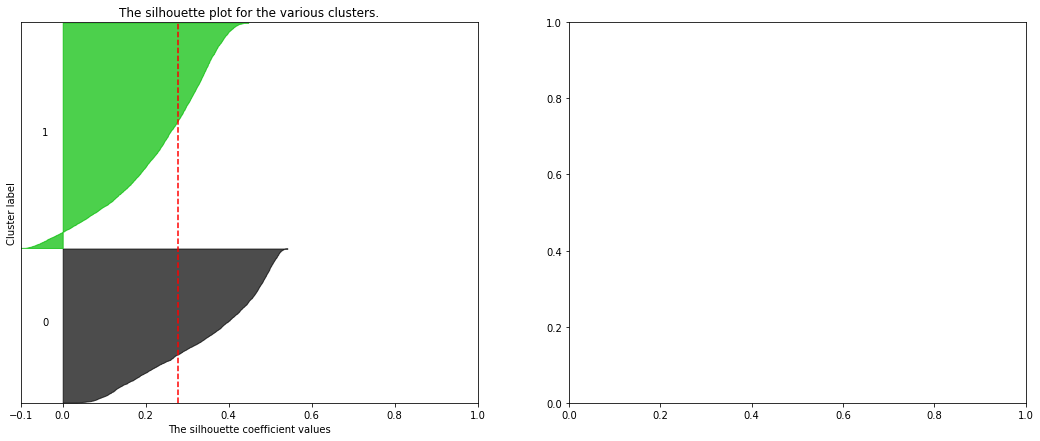

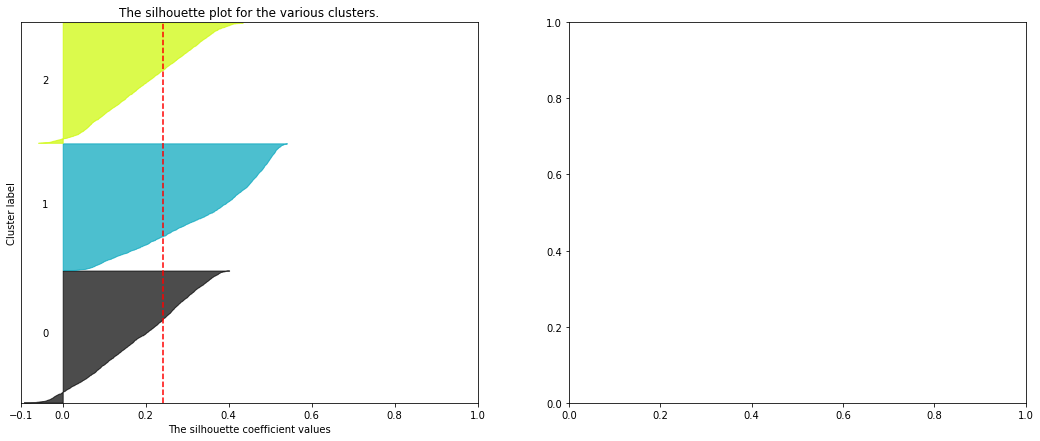

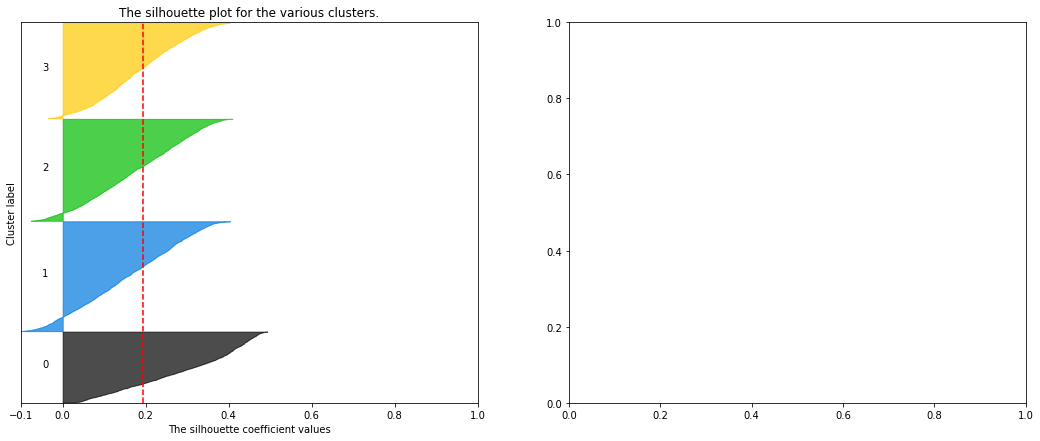

In [265]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, data_3.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [266]:
cluster_3 = KMeans(n_clusters=4).fit(data_3)
silhouette_score(data_3, cluster_3.labels_)

0.19416082

In [267]:
unique, counts = np.unique(cluster_3.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 1467, 1: 1983, 2: 2278, 3: 2115}

In [269]:
digit_labels

{0: {4: 0.6220402084884586,
  2: 0.3362620997766195,
  7: 0.00774385703648548,
  8: 0.011466865227103499,
  6: 0.018912881608339538,
  1: 0.0029784065524944155,
  9: 0.0004467609828741623,
  0: 0.0001489203276247208},
 1: {3: 0.6780159332321699,
  1: 0.1451062215477997,
  0: 0.17346358118361152,
  6: 0.0018968133535660092,
  2: 0.0015174506828528073},
 2: {6: 0.9262180974477958,
  7: 0.021809744779582366,
  1: 0.011368909512761021,
  0: 0.03642691415313225,
  2: 0.004176334106728539},
 3: {2: 0.15172765523396659,
  9: 0.6905520846614815,
  0: 0.128649751370649,
  1: 0.025627948489098558,
  6: 0.0033150580135152363,
  7: 0.00012750223128904755},
 4: {7: 0.9408988302893495,
  1: 0.0568438333675354,
  6: 0.0016416991586291811,
  0: 0.00020521239482864764,
  8: 0.00020521239482864764,
  2: 0.00020521239482864764},
 5: {0: 0.11279333838001514,
  2: 0.8508705526116578,
  1: 0.03255109765329296,
  9: 0.003785011355034065},
 6: {8: 0.808334711427154,
  0: 0.05457251529684141,
  2: 0.0525880601

In [280]:
%%time
th = 0.1
new_class_matrix_2 = {}

for label in digit_labels:
    
    indices = []
    
    df = data_train_ats.loc[data_train_ats['y'] == label]
    
    to_include = list(dict(filter(lambda elem: elem[1] <= th,digit_labels[label].items())).keys())
    low_include = list(set(list(digit_labels[label].keys())) - set(to_include))
    
    
    for i in to_include:
        indices.extend(df.loc[df['y_kmeans'] == i].index.tolist())
        
    upper_limit = len(indices)
    
    for l in low_include:
        low_indices = df.loc[df['y_kmeans'] == l].index.tolist()
        chosen_low_indices = random.sample(low_indices, upper_limit)
        indices.extend(chosen_low_indices)
        
    new_class_matrix_2[label] = indices

CPU times: user 62.7 ms, sys: 6.57 ms, total: 69.3 ms
Wall time: 68.3 ms


In [287]:
for label in range(10):
    
    print(set(new_class_matrix_2[label]).issubset(set(orig[label])))

True
True
True
True
True
True
True
True
True
True


In [288]:
for i in new_class_matrix_2.keys():
    print(len(new_class_matrix_2[i]))

840
144
636
912
576
144
2318
172
1370
381


In [289]:
with open('new_class_matrix_2.npy', 'wb') as f:
    np.save(f, [new_class_matrix_2])

In [294]:
len(new_class_matrix_2.values())

10

In [295]:
digit_labels

{0: {4: 0.6220402084884586,
  2: 0.3362620997766195,
  7: 0.00774385703648548,
  8: 0.011466865227103499,
  6: 0.018912881608339538,
  1: 0.0029784065524944155,
  9: 0.0004467609828741623,
  0: 0.0001489203276247208},
 1: {3: 0.6780159332321699,
  1: 0.1451062215477997,
  0: 0.17346358118361152,
  6: 0.0018968133535660092,
  2: 0.0015174506828528073},
 2: {6: 0.9262180974477958,
  7: 0.021809744779582366,
  1: 0.011368909512761021,
  0: 0.03642691415313225,
  2: 0.004176334106728539},
 3: {2: 0.15172765523396659,
  9: 0.6905520846614815,
  0: 0.128649751370649,
  1: 0.025627948489098558,
  6: 0.0033150580135152363,
  7: 0.00012750223128904755},
 4: {7: 0.9408988302893495,
  1: 0.0568438333675354,
  6: 0.0016416991586291811,
  0: 0.00020521239482864764,
  8: 0.00020521239482864764,
  2: 0.00020521239482864764},
 5: {0: 0.11279333838001514,
  2: 0.8508705526116578,
  1: 0.03255109765329296,
  9: 0.003785011355034065},
 6: {8: 0.808334711427154,
  0: 0.05457251529684141,
  2: 0.0525880601

In [296]:
digit_caps = {}
for i in range(10):
    
    all_i = data_train_ats.loc[data_train_ats['y'] == i]
    
    cluster_caps = {}
    for cluster in digit_labels[i]:
        cluster_caps[cluster] = len(all_i.loc[all_i['y_kmeans'] == cluster].index.tolist())
    digit_caps[i] = cluster_caps

In [297]:
digit_caps

{0: {4: 4177, 2: 2258, 7: 52, 8: 77, 6: 127, 1: 20, 9: 3, 0: 1},
 1: {3: 7149, 1: 1530, 0: 1829, 6: 20, 2: 16},
 2: {6: 3992, 7: 94, 1: 49, 0: 157, 2: 18},
 3: {2: 1190, 9: 5416, 0: 1009, 1: 201, 6: 26, 7: 1},
 4: {7: 4585, 1: 277, 6: 8, 0: 1, 8: 1, 2: 1},
 5: {0: 149, 2: 1124, 1: 43, 9: 5},
 6: {8: 4888, 0: 330, 2: 318, 1: 108, 7: 261, 6: 142},
 7: {5: 4600, 1: 3302, 7: 1333, 0: 14, 2: 24, 6: 5},
 8: {0: 4487, 9: 62, 2: 372, 1: 228, 6: 17, 8: 6},
 9: {7: 1564, 1: 2206, 0: 43, 2: 81, 8: 1, 6: 2}}

In [358]:
num_samples = 20000
class_cap = int(num_samples/len(digit_caps.keys()))

In [359]:
%%time
all_indices = range(data_train_ats.shape[0])
available_indices = all_indices

new_class_matrix_ss = {}

for digit, caps in digit_caps.items():
    
    
    current_cap = class_cap
    df_digit = data_train_ats.loc[data_train_ats['y'] == digit]
    
    available_bins = caps
    
    digit_indices = []
    
    while current_cap != 0:
        
        num_bins = len(available_bins.keys())
        allocation = current_cap/num_bins
        
        smallest_cluster = min(available_bins, key=available_bins.get)
        smallest_available_cap = available_bins[smallest_cluster]
        
    
        if allocation >= smallest_available_cap:
            
            for cluster, _ in available_bins.items():
                indices = df_digit.loc[df_digit['y_kmeans'] == cluster].index.tolist()
                chosen_indices = random.sample(available_indices, smallest_available_cap)
                digit_indices.extend(chosen_indices)
                available_indices = list(set(all_indices)-set(chosen_indices))
                
            available_bins = {cluster:capacity - smallest_available_cap for cluster, capacity in available_bins.items()}
            available_bins = {cluster:capacity for cluster, capacity in available_bins.items() if capacity!=0}
            current_cap = current_cap - smallest_available_cap * num_bins
            
            
        else:
            
            divided_proportion = int(current_cap/len(available_bins))
            
            for cluster, _ in available_bins.items():
                indices = df_digit.loc[df_digit['y_kmeans'] == cluster].index.tolist()
                chosen_indices = random.sample(available_indices, divided_proportion)
                digit_indices.extend(chosen_indices)
                
            current_cap = 0 
            
    new_class_matrix_ss[digit] = digit_indices

ZeroDivisionError: division by zero

In [341]:
available_bins

{4: 4050, 2: 2131}

In [356]:
len(new_class_matrix_ss[8])

999

In [357]:
with open('new_class_matrix_ss.npy', 'wb') as f:
    np.save(f, [new_class_matrix_ss])